In [1]:
import transportation_tutorials as tt

In [2]:
import geopandas as gpd

In [3]:
shapefile_filename = tt.data('SERPM8-TAZSHAPE')
taz = gpd.read_file(shapefile_filename)

In [4]:
taz.head()

OBJECTID  TAZ_REG  TAZ_OLD05  TAZ_MPO  COUNTY CENSUSTAZ  TAZ_BF  FIX  \
0         1   1122.0       1122     1122     1.0      None       0    0   
1         2     17.0         17       17     1.0      None       0    0   
2         3   1123.0       1123     1123     1.0      None       0    0   
3         4   1120.0       1120     1120     1.0      None       0    0   
4         5   1121.0       1121     1121     1.0      None       0    0   

         AREA  F_NETAREA  CBD  HM_ROOMS    Shape_Leng    Shape_Area  \
0   4442490.0     0.8153    0         0  10592.846522  4.442490e+06   
1  15689400.0     0.8571    0         0  17396.297932  1.568938e+07   
2  17396100.0     0.8663    0         0  23585.421941  1.739613e+07   
3   1303420.0     0.8536    0         0   7202.864864  1.303422e+06   
4  31477500.0     0.8787    0         0  24940.959492  3.147748e+07   

                                            geometry  
0  POLYGON ((936374.674 959539.568, 936373.444 95...  
1  POLYGON ((942254.500 952920.937, 942255.812 95...  
2  POLYGON ((940953.561 952985.069, 940953.437 95...  
3  POLYGON ((953119.000 951985.375, 953045.807 95...  
4  POLYGON ((934328.283 951600.585, 934327.451 94...

In [5]:
len(taz)

4236

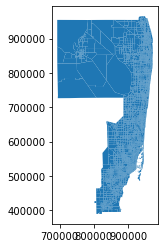

In [6]:
ax = taz.plot()

## Coordinate Reference Systems

In [7]:
taz.crs

<Projected CRS: EPSG:2236>
Name: NAD83 / Florida East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Florida - SPCS - E
- bounds: (-82.33, 24.41, -79.97, 30.83)
Coordinate Operation:
- name: SPCS83 Florida East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [8]:
taz1 = taz.to_crs(epsg=4326)

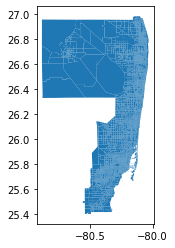

In [9]:
ax = taz1.plot()

In [10]:
xmin = 905712.145924
ymin = 905343.94408855
xmax = 983346.68922847
ymax = 981695.93140023

In [11]:
taz_jupiter = taz.cx[xmin:xmax, ymin:ymax]

In [12]:
len(taz_jupiter)

220

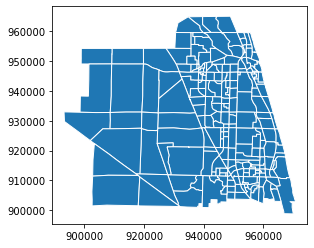

In [13]:
ax = taz_jupiter.plot(edgecolor='w')

In [14]:
taz_jupiter2 = taz.cx[xmin:, ymin:]
taz_jupiter2.equals(taz_jupiter)

True

/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


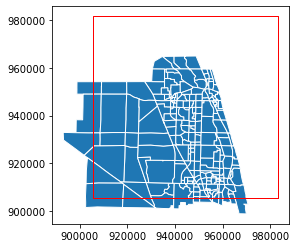

In [15]:
from shapely.geometry import box
study_area = gpd.GeoDataFrame(geometry=[box(xmin, ymin, xmax, ymax)], crs={'init': 'epsg:2236'})
ax = taz_jupiter.plot(edgecolor='w')
transparent = (0,0,0,0)
ax = study_area.plot(ax=ax, edgecolor='red', facecolor=transparent)

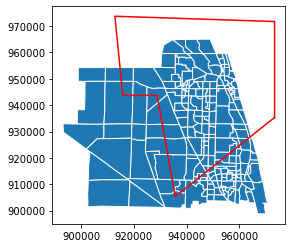

In [16]:
from shapely.geometry import Polygon
irregular_polygon = Polygon([
    (973346, 935343),
    (973346, 971695),
    (912812, 973695),
    (915812, 943695),
    (928812, 943695),
    (935712, 905343),
])
ax = taz_jupiter.plot(edgecolor='w')
lines = ax.plot(*irregular_polygon.exterior.xy, color='r')

In [17]:
taz_jupiter.intersects(irregular_polygon)

0       True
1       True
2       True
3       True
4       True
        ... 
1641    True
1642    True
1643    True
1644    True
1645    True
Length: 220, dtype: bool

In [18]:
taz_jupiter_irregular = taz_jupiter[taz_jupiter.intersects(irregular_polygon)]

In [19]:
len(taz_jupiter_irregular)

146

In [20]:
taz_jupiter_irregular = taz_jupiter_irregular.copy()

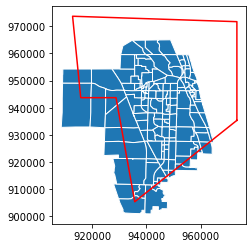

In [21]:
ax = taz_jupiter_irregular.plot(edgecolor='w')
lines = ax.plot(*irregular_polygon.exterior.xy, color='r')

In [22]:
taz_jupiter_clip = gpd.overlay(taz, study_area, how='intersection')

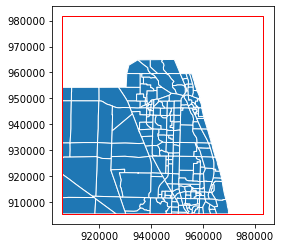

In [23]:
ax = taz_jupiter_clip.plot(edgecolor='w')
transparent = (0,0,0,0)
ax = study_area.plot(ax=ax, edgecolor='red', facecolor=transparent)

In [24]:
taz_jupiter_irregular.geometry = taz_jupiter_irregular.intersection(irregular_polygon)

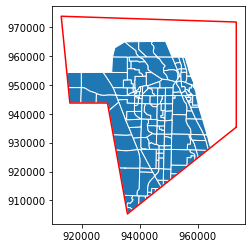

In [25]:
ax = taz_jupiter_irregular.plot(edgecolor='w')
transparent = (0,0,0,0)
lines = ax.plot(*irregular_polygon.exterior.xy, color='r')

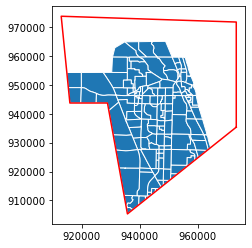

In [27]:
taz_jupiter_clip.geometry = taz_jupiter_clip.intersection(irregular_polygon)

ax = taz_jupiter_clip.plot(edgecolor='w')
transparent = (0,0,0,0)
lines = ax.plot(*irregular_polygon.exterior.xy, color='r')

In [28]:
len(taz_jupiter_irregular), len(taz_jupiter_clip)

(146, 220)

In [29]:
sum(taz_jupiter_clip.geometry.area == 0)

74

In [30]:
mazshape_filename = tt.data('SERPM8-MAZSHAPE')
maz = gpd.read_file(mazshape_filename)

In [31]:
len(maz)

12022

In [32]:
maz.head()

OBJECTID   MAZ    SHAPE_LENG    SHAPE_AREA  ACRES  POINT_X  POINT_Y  \
0         1  5347   8589.393674  3.111034e+06     71   953130   724165   
1         2  5348  11974.067469  7.628753e+06    175   907018   634551   
2         3  5349   9446.131753  4.007041e+06     92   923725   707062   
3         4  5350  21773.153739  2.487397e+07    571   908988   713484   
4         5  5351  17882.701416  1.963139e+07    451   909221   717493   

                                            geometry  
0  POLYGON ((953970.466 723936.081, 953972.382 72...  
1  POLYGON ((908505.280 635081.774, 908488.945 63...  
2  POLYGON ((922736.637 708387.692, 923950.960 70...  
3  POLYGON ((908334.237 715692.263, 908714.653 71...  
4  POLYGON ((911883.019 719309.326, 911940.995 71...

In [33]:
maz_jupiter = maz.cx[xmin:xmax, ymin:ymax]

In [34]:
len(maz_jupiter)

361

In [35]:
maz_taz = gpd.overlay(maz_jupiter, taz_jupiter, how='intersection')

In [36]:
maz_taz.head()

OBJECTID_1    MAZ    SHAPE_LENG    SHAPE_AREA  ACRES  POINT_X  POINT_Y  \
0        2391   7738  18511.806088  1.405994e+07    323   937715   953796   
1        6329  11676  10422.047410  3.336191e+06     77   937781   950989   
2        3058   8405  23307.316904  2.101123e+07    482   940252   956037   
3        3053   8400  21094.345933  2.778533e+07    638   933039   956882   
4        2389   7736  10592.846522  4.442490e+06    102   936259   957308   

   OBJECTID_2  TAZ_REG  TAZ_OLD05  ...  CENSUSTAZ  TAZ_BF FIX        AREA  \
0           3   1123.0       1123  ...       None       0   0  17396100.0   
1           3   1123.0       1123  ...       None       0   0  17396100.0   
2         670    837.0        837  ...       None       0   0  21011200.0   
3         665   1106.0       1106  ...       None       0   0  27785300.0   
4           1   1122.0       1122  ...       None       0   0   4442490.0   

   F_NETAREA  CBD  HM_ROOMS    Shape_Leng    Shape_Area  \
0     0.8663    0         0  23585.421941  1.739613e+07   
1     0.8663    0         0  23585.421941  1.739613e+07   
2     0.7167    0         0  23307.316904  2.101123e+07   
3     0.9483    0         0  21094.345933  2.778533e+07   
4     0.8153    0         0  10592.846522  4.442490e+06   

                                            geometry  
0  POLYGON ((938309.917 952656.485, 938072.285 95...  
1  POLYGON ((938309.917 952656.485, 938316.202 95...  
2  POLYGON ((939302.687 958227.563, 939832.250 95...  
3  POLYGON ((935665.750 959535.375, 935662.121 95...  
4  POLYGON ((936374.674 959539.568, 936373.444 95...  

[5 rows x 22 columns]

In [37]:
len(maz_taz)

437

In [38]:
maz_taz.head().area

0    1.405994e+07
1    3.336191e+06
2    2.101123e+07
3    2.778533e+07
4    4.442490e+06
dtype: float64

/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/transportation_tutorials/mapping/__init__.py:90: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  url = getattr(ctx.sources, url, url)
/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/transportation_tutorials/mapping/__init__.py:101: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  basemap, extent_ = ctx.bounds2img(xmin_, ymin_, xmax_, ymax_, zoom=zoom, url=url)
/Users/cheng_xi/opt/anaconda3

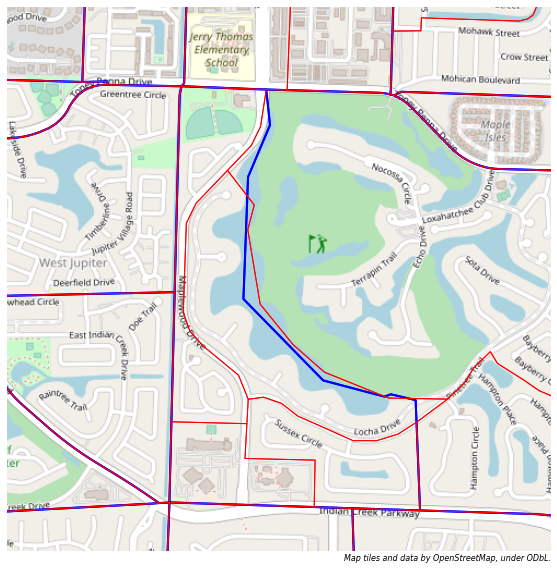

In [40]:
ax = tt.mapping.make_basemap(xlim=(938500,945500), ylim=(937500,944500), zoom=15, tiles='OSM_A', epsg=2236, axis='off')
ax = taz_jupiter.plot(ax=ax, edgecolor='blue', linewidth=2, facecolor=transparent )
ax = maz_jupiter.plot(ax=ax, edgecolor='red', linewidth=1, facecolor=transparent )


In [41]:
maz_taz = maz_taz.iloc[maz_taz.area.argsort()]

In [42]:
maz_taz = maz_taz.drop_duplicates('MAZ', keep='last')

In [43]:
len(maz_taz)

361

/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/transportation_tutorials/mapping/__init__.py:90: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  url = getattr(ctx.sources, url, url)
/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/transportation_tutorials/mapping/__init__.py:101: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  basemap, extent_ = ctx.bounds2img(xmin_, ymin_, xmax_, ymax_, zoom=zoom, url=url)
/Users/cheng_xi/opt/anaconda3

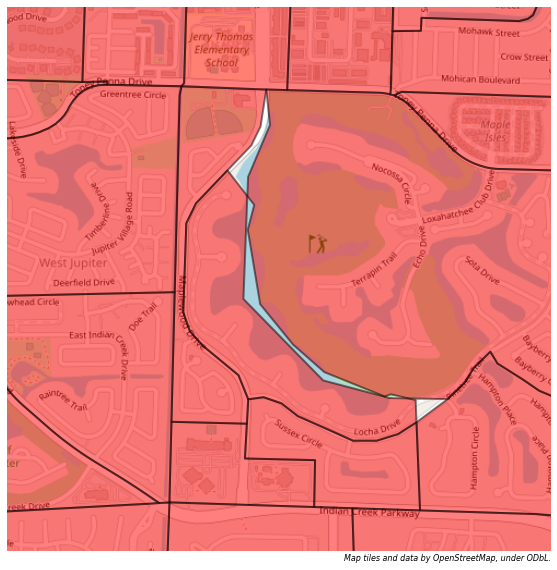

In [44]:
ax = tt.mapping.make_basemap(xlim=(938500,945500), ylim=(937500,944500), zoom=15, tiles='OSM_A', epsg=2236, axis='off')
ax = maz_taz.plot(ax=ax, edgecolor='k', linewidth=2, facecolor='r', alpha=0.5 )

In [45]:
maz_points = maz_jupiter.copy()

In [46]:
from shapely.geometry import Point
maz_points.geometry = maz_points.apply(lambda x: Point(x.POINT_X, x.POINT_Y), axis=1)

In [47]:
sjoined = gpd.sjoin(maz_points, taz_jupiter, how='left', op='within')

In [48]:
len(sjoined)

361

In [49]:
sjoined.head()

OBJECTID_left   MAZ    SHAPE_LENG    SHAPE_AREA  ACRES  POINT_X  \
2388           2389  7736  10592.846522  4.442490e+06    102   936259   
2389           2390  7737  17396.297932  1.568938e+07    360   940102   
2390           2391  7738  18511.806088  1.405994e+07    323   937715   
2391           2392  7739   7202.864864  1.303422e+06     30   953218   
2392           2393  7740  24940.959492  3.147748e+07    723   931973   

      POINT_Y                       geometry  index_right  OBJECTID_right  \
2388   957308  POINT (936259.000 957308.000)            0               1   
2389   950911  POINT (940102.000 950911.000)            1               2   
2390   953796  POINT (937715.000 953796.000)            2               3   
2391   953704  POINT (953218.000 953704.000)            3               4   
2392   952018  POINT (931973.000 952018.000)            4               5   

      ...  COUNTY  CENSUSTAZ  TAZ_BF  FIX        AREA  F_NETAREA  CBD  \
2388  ...     1.0       None       0    0   4442490.0     0.8153    0   
2389  ...     1.0       None       0    0  15689400.0     0.8571    0   
2390  ...     1.0       None       0    0  17396100.0     0.8663    0   
2391  ...     1.0       None       0    0   1303420.0     0.8536    0   
2392  ...     1.0       None       0    0  31477500.0     0.8787    0   

      HM_ROOMS    Shape_Leng    Shape_Area  
2388         0  10592.846522  4.442490e+06  
2389         0  17396.297932  1.568938e+07  
2390         0  23585.421941  1.739613e+07  
2391         0   7202.864864  1.303422e+06  
2392         0  24940.959492  3.147748e+07  

[5 rows x 23 columns]

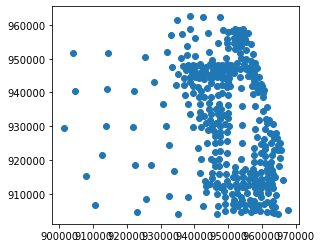

In [50]:
ax = sjoined.plot()

In [51]:
sjoined.MAZ.equals(maz_jupiter.MAZ)

True

In [52]:
sjoined.geometry = maz_jupiter.geometry

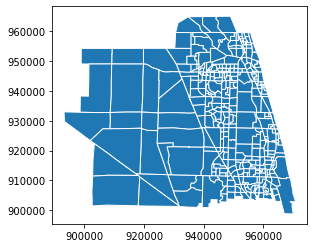

In [53]:
ax = sjoined.plot(edgecolor='w')

In [54]:
sjoined.index=sjoined.MAZ

In [55]:
maz_taz_crosswalk = dict(sjoined.TAZ_MPO)

In [56]:
maz_number = 7755
taz_number = maz_taz_crosswalk[maz_number]

# OpenStreetMap Data

In [1]:
import transportation_tutorials as tt

In [2]:
import osmnx as ox
import geopandas as gpd
import networkx as nx
import numpy as np

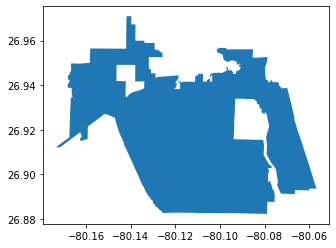

In [6]:
city = ox.gdf_from_place('Jupiter, Florida, USA')
ax = city.plot()

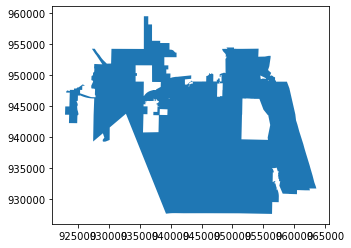

In [7]:
official_shp = tt.download_zipfile("http://www.jupiter.fl.us/DocumentCenter/View/10297")
city_official = gpd.read_file(official_shp)
ax = city_official.plot()

In [8]:
city.crs, city_official.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:2881>
 Name: NAD83(HARN) / Florida East (ftUS)
 Axis Info [cartesian]:
 - X[east]: Easting (US survey foot)
 - Y[north]: Northing (US survey foot)
 Area of Use:
 - name: USA - Florida - SPCS - E
 - bounds: (-82.33, 24.41, -79.97, 30.83)
 Coordinate Operation:
 - name: SPCS83 Florida East zone (US Survey feet)
 - method: Transverse Mercator
 Datum: NAD83 (High Accuracy Reference Network)
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

In [11]:
city.to_crs(epsg=2881, inplace=True)  # Changing the crs for a GeoDataFrame is simple as well.

In [10]:
city.crs, city_official.crs

(<Projected CRS: EPSG:2881>
 Name: NAD83(HARN) / Florida East (ftUS)
 Axis Info [cartesian]:
 - X[east]: Easting (US survey foot)
 - Y[north]: Northing (US survey foot)
 Area of Use:
 - name: USA - Florida - SPCS - E
 - bounds: (-82.33, 24.41, -79.97, 30.83)
 Coordinate Operation:
 - name: SPCS83 Florida East zone (US Survey feet)
 - method: Transverse Mercator
 Datum: NAD83 (High Accuracy Reference Network)
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich,
 <Projected CRS: EPSG:2881>
 Name: NAD83(HARN) / Florida East (ftUS)
 Axis Info [cartesian]:
 - X[east]: Easting (US survey foot)
 - Y[north]: Northing (US survey foot)
 Area of Use:
 - name: USA - Florida - SPCS - E
 - bounds: (-82.33, 24.41, -79.97, 30.83)
 Coordinate Operation:
 - name: SPCS83 Florida East zone (US Survey feet)
 - method: Transverse Mercator
 Datum: NAD83 (High Accuracy Reference Network)
 - Ellipsoid: GRS 1980
 - Prime Meridian: Greenwich)

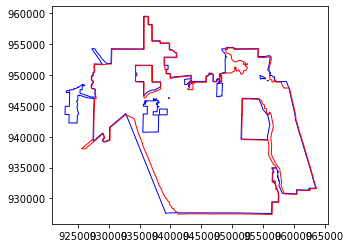

In [12]:
transparent = (0,0,0,0)
ax = city_official.plot(edgecolor='blue', facecolor=transparent)
ax = city.plot(ax=ax, edgecolor='red', facecolor=transparent)

/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/transportation_tutorials/mapping/__init__.py:101: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  basemap, extent_ = ctx.bounds2img(xmin_, ymin_, xmax_, ymax_, zoom=zoom, url=url)
/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/contextily/tile.py:268: FutureWarning: The url format using 'tileX', 'tileY', 'tileZ' as placeholders is deprecated. Please use '{x}', '{y}', '{z}' instead.
  FutureWarning,
/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

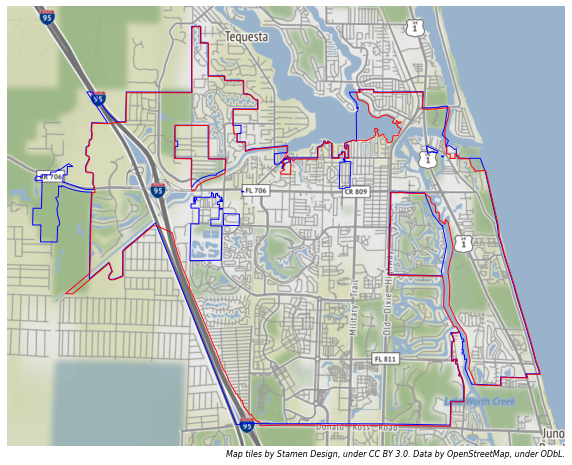

In [13]:
ax = city_official.plot(edgecolor='blue', facecolor=transparent)
ax = city.plot(ax=ax, edgecolor='red', facecolor=transparent)
ax = tt.mapping.add_basemap(ax=ax, zoom=13, epsg=2881, axis='off', figsize=(10,10))

In [14]:
jupiter_streets = ox.graph_from_place('Jupiter, Florida, USA')

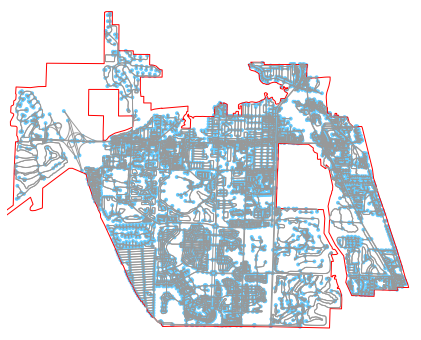

In [15]:
fig, ax = ox.plot_graph(jupiter_streets, show=False, close=False)
ax = city.to_crs(epsg=4326).plot(ax=ax, edgecolor='red', facecolor=transparent)

In [16]:
study_area = city.buffer(20000).envelope.to_crs(epsg=4326)

In [17]:
west, south, east, north = study_area.total_bounds
streets = ox.graph_from_bbox(north, south, east, west, simplify=False)

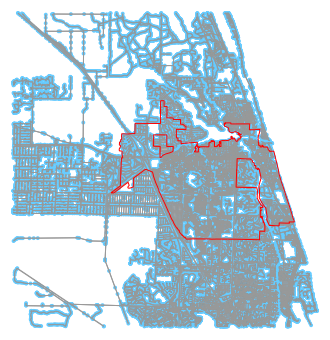

In [18]:
fig, ax = ox.plot_graph(streets, show=False, close=False)
ax = city.to_crs(epsg=4326).plot(ax=ax, edgecolor='red', facecolor=transparent, zorder=2)

In [19]:
type(streets)

networkx.classes.multidigraph.MultiDiGraph

In [ ]:
len(streets.nodes), len(streets.edges)

In [21]:
streets.edges[5379723376, 5379723385, 0]

{'osmid': 202361740,
 'oneway': True,
 'lanes': '3',
 'ref': 'FL 706',
 'name': 'West Indiantown Road',
 'highway': 'primary',
 'maxspeed': '45 mph',
 'length': 77.802}

In [22]:
highway_types = []
for i in streets.edges.values():
    highway_types.append(str(i['highway']))
unique_highway_types, count_highway_types = np.unique(highway_types, return_counts=True)
link_type_counts = {}
for u, c in zip(unique_highway_types, count_highway_types):
    link_type_counts[u] = c
link_type_counts

{'cycleway': 454,
 'footway': 16630,
 'motorway': 511,
 'motorway_link': 687,
 'path': 22758,
 'primary': 1754,
 'primary_link': 232,
 'residential': 76699,
 'secondary': 356,
 'secondary_link': 14,
 'service': 66158,
 'steps': 30,
 'tertiary': 7299,
 'tertiary_link': 127,
 'track': 5994,
 'unclassified': 1212}

In [23]:
dict(zip(*np.unique([str(i['highway']) for i in streets.edges.values()], return_counts=True)))

{'cycleway': 454,
 'footway': 16630,
 'motorway': 511,
 'motorway_link': 687,
 'path': 22758,
 'primary': 1754,
 'primary_link': 232,
 'residential': 76699,
 'secondary': 356,
 'secondary_link': 14,
 'service': 66158,
 'steps': 30,
 'tertiary': 7299,
 'tertiary_link': 127,
 'track': 5994,
 'unclassified': 1212}

In [24]:
major_types = {
    'motorway', 'motorway_link',
    'primary', 'primary_link',
    'secondary', 'secondary_link',
    'tertiary', 'tertiary_link',
}
streets.remove_edges_from( [
    k for (k,v) in streets.edges.items()
    if v.get('highway') not in major_types
] )

In [25]:
len(streets.nodes), len(streets.edges)

(98657, 10980)

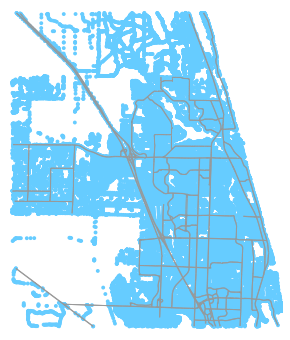

In [26]:
fig, ax = ox.plot_graph(streets)

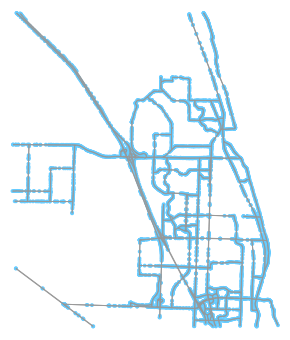

In [27]:
streets.remove_nodes_from(
    list(nx.isolates(streets)) # list-ify to gather nodes first then remove them
)
fig, ax = ox.plot_graph(streets)

In [28]:
len(streets.nodes), len(streets.edges)

(7844, 10980)

In [29]:
jupiter_center = 382641489 # Node at Northbound Old Dixie at Westbound Indiantown

# Nodes that can be reached from jupiter_center
connected_nodes_out = set(nx.shortest_path(streets, source=jupiter_center, weight='length').keys())

# Nodes that can reach jupiter_center
connected_nodes_in = set(nx.shortest_path(streets, target=jupiter_center, weight='length').keys())

# Nodes that are full connected
connected_nodes = connected_nodes_out & connected_nodes_in

# The rest
unconnected_nodes = [node for node in streets.nodes() if node not in connected_nodes]

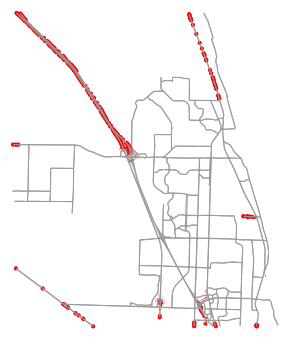

In [30]:
nc = ['w' if node in connected_nodes else 'r' for node in streets.nodes()]
fig, ax = ox.plot_graph(streets, node_color=nc)

In [31]:
streets.remove_nodes_from(unconnected_nodes)

In [32]:
len(connected_nodes), len(streets)

(7045, 7045)

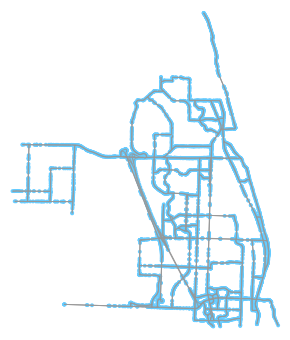

In [33]:
fig, ax = ox.plot_graph(streets)

# Creating Static Maps

In [35]:
import transportation_tutorials as tt

In [36]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [37]:
xmin = 905712
ymin = 905343
taz = gpd.read_file(tt.data('SERPM8-TAZSHAPE')).cx[xmin:, ymin:]
maz = gpd.read_file(tt.data('SERPM8-MAZSHAPE')).cx[xmin:, ymin:]
center = (945495, 941036)

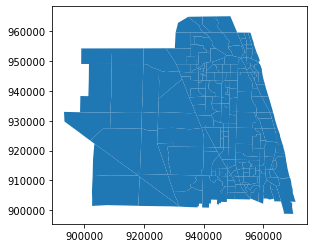

In [38]:
ax = taz.plot()

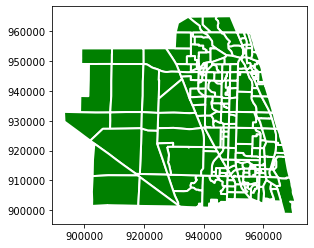

In [39]:
ax = taz.plot(color='green', linewidth=2, edgecolor='white')

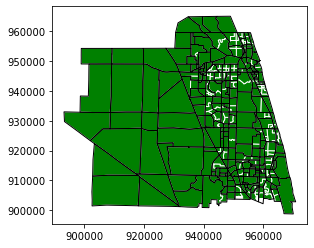

In [42]:
ax = maz.plot(linewidth=1,  color='green', edgecolor='white')

ax = taz.plot(ax=ax, color=(0,0,0,0), linewidth=1, edgecolor='black')

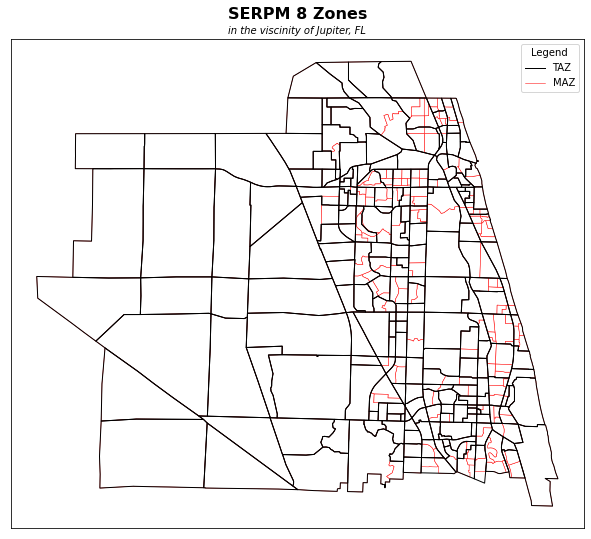

In [43]:
fig, ax = plt.subplots(figsize=(12,9))
ax.axis('on')      # do show axis as a frame
ax.set_xticks([])  # but no tick marks
ax.set_yticks([])  # one either axis
ax.set_title("SERPM 8 Zones", fontweight='bold', fontsize=16, pad=20)
ax.annotate('in the viscinity of Jupiter, FL',
            xy=(0.5, 1.0), xycoords='axes fraction',
            xytext=(0, 5), textcoords='offset points',
            horizontalalignment='center',
            fontstyle='italic')
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='black', linewidth=1, label='TAZ'),
    Line2D([0], [0], color='red', linewidth=0.5, label='MAZ'),
]
ax.legend(handles=legend_elements, title='Legend')
ax = maz.plot(ax=ax, linewidth=0.5,  color='white', edgecolor='red', label='MAZ')
ax = taz.plot(ax=ax, color=(0,0,0,0), linewidth=1, edgecolor='black')

In [44]:
mazd = pd.read_csv(tt.data('SERPM8-MAZDATA', '*.csv'))

In [45]:
mazd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12022 entries, 0 to 12021
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mgra                          12022 non-null  int64  
 1   TAZ                           12022 non-null  int64  
 2   HH                            12022 non-null  int64  
 3   POP                           12022 non-null  int64  
 4   emp_self                      12022 non-null  int64  
 5   emp_ag                        12022 non-null  int64  
 6   emp_const_non_bldg_prod       12022 non-null  int64  
 7   emp_const_non_bldg_office     12022 non-null  int64  
 8   emp_utilities_prod            12022 non-null  int64  
 9   emp_utilities_office          12022 non-null  int64  
 10  emp_const_bldg_prod           12022 non-null  int64  
 11  emp_const_bldg_office         12022 non-null  int64  
 12  emp_mfg_prod                  12022 non-null  int64  
 13  e

In [46]:
maz1 = maz.merge(mazd, how='left', left_on='MAZ', right_on='mgra')

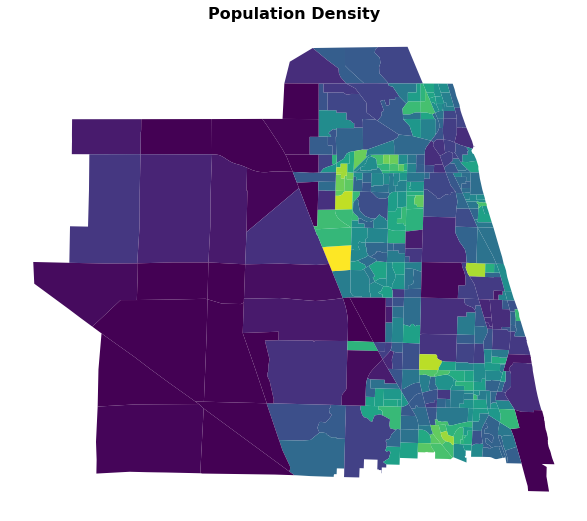

In [49]:
fig, ax = plt.subplots(figsize=(12,9))
ax.axis('off') # don't show axis
ax.set_title("Population Density", fontweight='bold', fontsize=16)
ax = maz1.plot(ax=ax, column='PopDen')

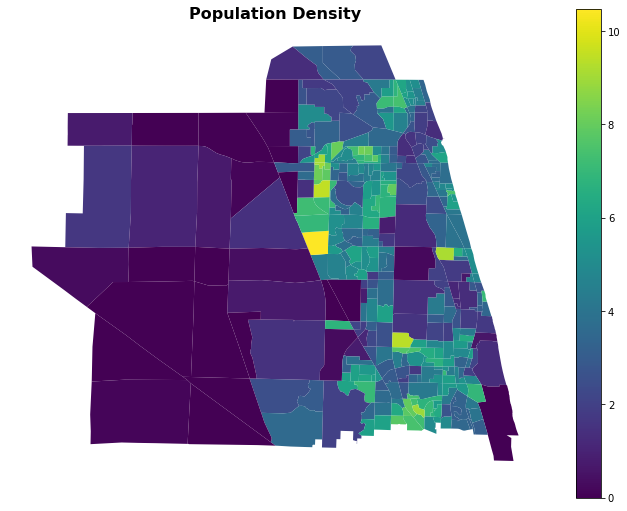

In [50]:
fig, ax = plt.subplots(figsize=(12,9))
ax.axis('off') # don't show axis
ax.set_title("Population Density", fontweight='bold', fontsize=16)
ax = maz1.plot(ax=ax, column='PopDen', legend=True)

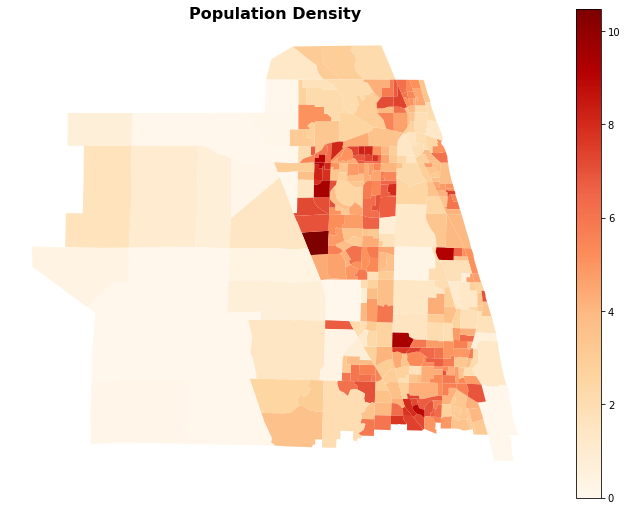

In [51]:
fig, ax = plt.subplots(figsize=(12,9))
ax.axis('off') # don't show axis
ax.set_title("Population Density", fontweight='bold', fontsize=16)
ax = maz1.plot(ax=ax, column='PopDen', legend=True, cmap='OrRd')

In [52]:
import contextily as ctx

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

    attribution_txt = "Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL."
    ax.annotate(
        attribution_txt,
        xy=(1.0, 0.0), xycoords='axes fraction',
        xytext=(0, -10), textcoords='offset points',
        horizontalalignment='right',
        fontstyle='italic',
        fontsize=8,
    )

    return ax

In [53]:
maz2 = maz1.to_crs(epsg=3857)

/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  """
/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  """


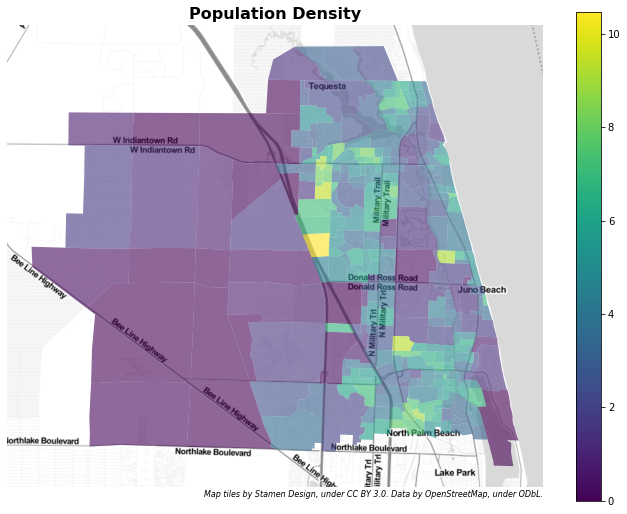

In [54]:
fig, ax = plt.subplots(figsize=(12,9))
ax.axis('off') # don't show axis
ax.set_title("Population Density", fontweight='bold', fontsize=16)
ax = maz2.plot(ax=ax, alpha=0.6, linewidth=0, cmap='viridis', column='PopDen', legend=True)
ax = add_basemap(ax, zoom=12, url=ctx.sources.ST_TONER_LITE)

In [55]:
tt.show_file(tt.tools.point_map)

In [56]:
random_points = tt.tools.point_map.generate_points_in_areas(maz1, values='POP', points_per_unit=20,)

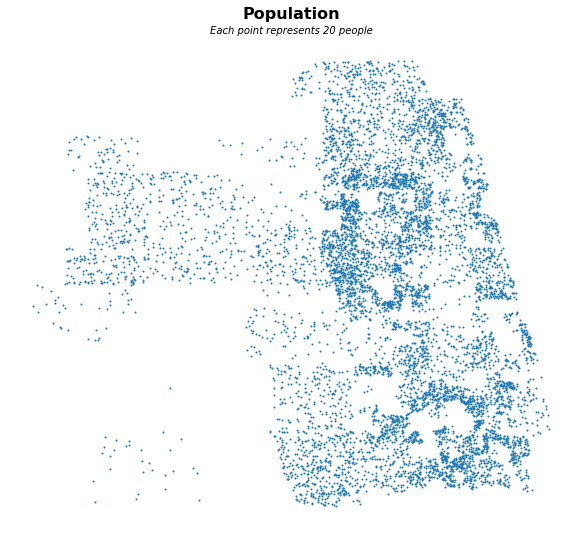

In [57]:
fig, ax = plt.subplots(figsize=(12,9))
ax.axis('off') # don't show axis
ax.set_title("Population", fontweight='bold', fontsize=16, pad=20)
ax.annotate('Each point represents 20 people',
            xy=(0.5, 1.0), xycoords='axes fraction',
            xytext=(0, 5), textcoords='offset points',
            horizontalalignment='center',
            fontstyle='italic')
ax = random_points.plot(ax=ax, markersize=1)


In [58]:
emp_points = tt.tools.point_map.generate_points_in_areas(maz2, values='emp_total', points_per_unit=25)

/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
  if sys.path[0] == '':
/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  """


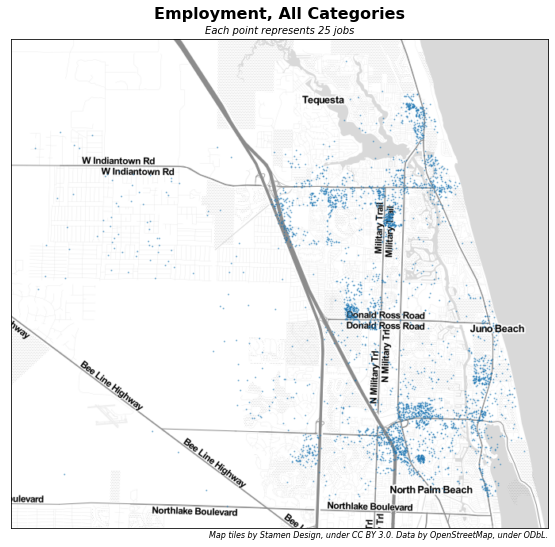

In [59]:
fig, ax = plt.subplots(figsize=(12,9))
ax.axis('on')      # do show axis as a frame
ax.set_xticks([])  # but no tick marks
ax.set_yticks([])  # one either axis
ax.set_title("Employment, All Categories", fontweight='bold', fontsize=16, pad=20)
ax = emp_points.plot(ax=ax, markersize=1, alpha=0.33)
ax.annotate('Each point represents 25 jobs',
            xy=(0.5, 1.0), xycoords='axes fraction',
            xytext=(0, 5), textcoords='offset points',
           horizontalalignment='center',
           fontstyle='italic')
ax = add_basemap(ax, zoom=12, url=ctx.sources.ST_TONER_LITE)


In [60]:
i = 'retail'
j = 'health'
i_points = tt.tools.point_map.generate_points_in_areas(maz2, values=f'emp_{i}', points_per_unit=25)
j_points = tt.tools.point_map.generate_points_in_areas(maz2, values=f'emp_{j}', points_per_unit=25)
maz2[f'emp_allother'] = maz2.emp_total - maz2[f'emp_{i}'] - maz2[f'emp_{j}']
o_points = tt.tools.point_map.generate_points_in_areas(maz2, values=f'emp_allother', points_per_unit=25)

/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: The "contextily.tile_providers" module is deprecated and will be removed in contextily v1.1. Please use "contextily.providers" instead.
/Users/cheng_xi/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  """


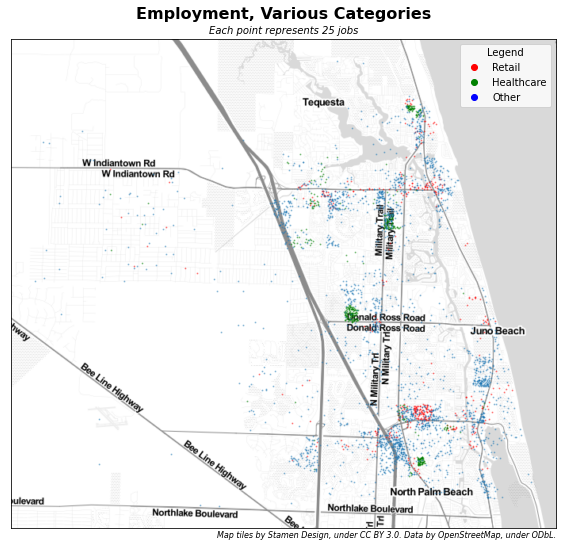

In [61]:
fig, ax = plt.subplots(figsize=(12,9))
ax.axis('on')      # do show axis as a frame
ax.set_xticks([])  # but no tick marks
ax.set_yticks([])  # one either axis
ax.set_title("Employment, Various Categories", fontweight='bold', fontsize=16, pad=20)
ax = i_points.plot(ax=ax, markersize=1, alpha=0.33, color='red')
ax = j_points.plot(ax=ax, markersize=1, alpha=0.33, color='green')
ax = o_points.plot(ax=ax, markersize=1, alpha=0.33)
legend_elements = [
    Line2D([0], [0], marker='o', lw=0, color='red', label='Retail'),
    Line2D([0], [0], marker='o', lw=0, color='green', label='Healthcare'),
    Line2D([0], [0], marker='o', lw=0, color='blue', label='Other'),
]
ax.legend(handles=legend_elements, title='Legend')
ax.annotate('Each point represents 25 jobs',
            xy=(0.5, 1.0), xycoords='axes fraction',
            xytext=(0, 5), textcoords='offset points',
           horizontalalignment='center',
           fontstyle='italic')
ax = add_basemap(ax, zoom=12, url=ctx.sources.ST_TONER_LITE)


# Creating Dynamic Maps

In [62]:
import transportation_tutorials as tt

In [63]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium

In [64]:
xmin = 905712
ymin = 905343
taz = gpd.read_file(tt.data('SERPM8-TAZSHAPE')).cx[xmin:, ymin:].to_crs(epsg=4326)
maz = gpd.read_file(tt.data('SERPM8-MAZSHAPE')).cx[xmin:, ymin:].to_crs(epsg=4326)
center = (26.9198, -80.1121) # regular lat-lon

In [65]:
m = folium.Map(center, zoom_start = 12)
folium.GeoJson(taz).add_to(m)
m

In [66]:
m = folium.Map(center, zoom_start = 12, tiles='CartoDB positron',)
m

In [67]:
m = folium.Map(
    location=[26.8645, -80.1040],
    tiles='Stamen Toner',
    zoom_start=13
)

folium.CircleMarker(
    radius=20, # in pixels, regardless of map zoom
    location=[26.8853, -80.1140],
    popup='Scripps Research Institute',
    color='blue', fill=True,
).add_to(m)

folium.Circle(
    radius=300, # in meters, scales with map zoom
    location=[26.8484, -80.0855],
    popup='The Gardens Mall',
    color='crimson', fill=True, fill_color='pink'
).add_to(m)

folium.Marker(
    [26.677037, -80.037117],
    popup='Mar-a-Lago Club',
    icon=folium.Icon(color='red', icon='info-sign'),
).add_to(m)

m

In [68]:
mazd = pd.read_csv(tt.data('SERPM8-MAZDATA', '*.csv'))

In [69]:
mazd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12022 entries, 0 to 12021
Data columns (total 76 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mgra                          12022 non-null  int64  
 1   TAZ                           12022 non-null  int64  
 2   HH                            12022 non-null  int64  
 3   POP                           12022 non-null  int64  
 4   emp_self                      12022 non-null  int64  
 5   emp_ag                        12022 non-null  int64  
 6   emp_const_non_bldg_prod       12022 non-null  int64  
 7   emp_const_non_bldg_office     12022 non-null  int64  
 8   emp_utilities_prod            12022 non-null  int64  
 9   emp_utilities_office          12022 non-null  int64  
 10  emp_const_bldg_prod           12022 non-null  int64  
 11  emp_const_bldg_office         12022 non-null  int64  
 12  emp_mfg_prod                  12022 non-null  int64  
 13  e

In [70]:
maz1 = maz.merge(mazd, how='left', left_on='MAZ', right_on='mgra')

In [71]:
maz1.index=maz1.MAZ

In [72]:
m = folium.Map(center, zoom_start = 12)
folium.Choropleth(
    geo_data=maz1,
    data=maz1.PopDen,
    key_on='feature.properties.MAZ',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Population Density'
).add_to(m)
m

In [73]:
from branca import colormap

colormapper = colormap.linear.YlGn_09.scale(
    maz1.PopDen.min(),
    maz1.PopDen.max(),
)
colormapper.caption = "Population Density"

def colormapper_with_zero(x):
    if x==0:
        return "#faded1"
    else:
        return colormapper(x)

m = folium.Map(center, zoom_start = 12)
gj = folium.GeoJson(
    maz1,
    style_function=lambda feature: {
        'fillColor': colormapper_with_zero(feature['properties']['PopDen']),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.8,
    },
    highlight_function=lambda feature: {
        'color': 'blue',
        'weight': 4,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['TAZ', 'MAZ', 'PopDen'],
    ),
).add_to(m)
colormapper.add_to(m)
m